# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


C:\Users\chris\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


614


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
unit="imperial"

base_url = "http://api.openweathermap.org/data/2.5/weather?"
#set a series of list to collect data from the API
lat=[]
lon=[]
temp=[]
humid=[]
clouds=[]
wind=[]
NAME=[]
ID=[]
date=[]

#for loop to iterate over each city and collect pertinent info into list
#had to make try except because some cities gave an error 
for city_name in cities:
    try:
        search_url = base_url + "appid=" + api_key + "&q=" + city_name + "&units=" + unit
        weather = requests.get(search_url)
        weather_json = weather.json()
        
        NAME.append(weather_json["name"])
        ID.append(weather_json["id"])     
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        temp.append(weather_json["main"]["temp"])
        humid.append(weather_json["main"]["humidity"])
        clouds.append(weather_json["clouds"]["all"])
        wind.append(weather_json["wind"]["speed"])
        date.append(weather_json["dt"])
        
        print("Data for:","City ID #:",weather_json["id"],"City Name:",weather_json["name"])
    except Exception:
        pass


Data for: City ID #: 1153669 City Name: Chiang Rai
Data for: City ID #: 1218612 City Name: Murgab
Data for: City ID #: 3652764 City Name: Puerto Ayora
Data for: City ID #: 1273574 City Name: Vaini
Data for: City ID #: 6185377 City Name: Yellowknife
Data for: City ID #: 4030556 City Name: Rikitea
Data for: City ID #: 3981432 City Name: Todos Santos
Data for: City ID #: 5106834 City Name: Albany
Data for: City ID #: 2075265 City Name: Busselton
Data for: City ID #: 1164306 City Name: Surab
Data for: City ID #: 1264489 City Name: Mahad
Data for: City ID #: 1865309 City Name: Katsuura
Data for: City ID #: 3418910 City Name: Upernavik
Data for: City ID #: 779554 City Name: Honningsvag
Data for: City ID #: 4035715 City Name: Avarua
Data for: City ID #: 4031574 City Name: Provideniya
Data for: City ID #: 1013076 City Name: Colesberg
Data for: City ID #: 3831208 City Name: Qaanaaq
Data for: City ID #: 2069194 City Name: Jamestown
Data for: City ID #: 6111862 City Name: Port Hardy
Data for: Cit

Data for: City ID #: 2120048 City Name: Ust-Nera
Data for: City ID #: 2094342 City Name: Kavieng
Data for: City ID #: 5401395 City Name: Temecula
Data for: City ID #: 3646190 City Name: Catia La Mar
Data for: City ID #: 5961417 City Name: Gimli
Data for: City ID #: 3026644 City Name: Souillac
Data for: City ID #: 1701054 City Name: Marawi
Data for: City ID #: 4501427 City Name: Port Elizabeth
Data for: City ID #: 5554428 City Name: Ketchikan
Data for: City ID #: 303873 City Name: Nazilli
Data for: City ID #: 1733782 City Name: Victoria
Data for: City ID #: 6167817 City Name: Torbay
Data for: City ID #: 3869716 City Name: Tocopilla
Data for: City ID #: 1167528 City Name: Quetta
Data for: City ID #: 3838859 City Name: Rio Gallegos
Data for: City ID #: 6144312 City Name: Sept-Iles
Data for: City ID #: 1625929 City Name: Sungaipenuh
Data for: City ID #: 3461789 City Name: Guaruja
Data for: City ID #: 1507116 City Name: Dudinka
Data for: City ID #: 140463 City Name: Birjand
Data for: City I

Data for: City ID #: 1690438 City Name: San Andres
Data for: City ID #: 3932145 City Name: Pisco
Data for: City ID #: 6355222 City Name: Yulara
Data for: City ID #: 1529484 City Name: Hami
Data for: City ID #: 5972762 City Name: Hay River
Data for: City ID #: 3421719 City Name: Narsaq
Data for: City ID #: 933649 City Name: Khakhea
Data for: City ID #: 2155562 City Name: Nelson Bay
Data for: City ID #: 590447 City Name: Karla
Data for: City ID #: 503581 City Name: Pyaozerskiy
Data for: City ID #: 2172797 City Name: Cairns
Data for: City ID #: 2027296 City Name: Aykhal
Data for: City ID #: 1621395 City Name: Kalianget
Data for: City ID #: 1580410 City Name: Hong Gai
Data for: City ID #: 2445704 City Name: Diffa
Data for: City ID #: 2337542 City Name: Naze
Data for: City ID #: 1506268 City Name: Gornopravdinsk
Data for: City ID #: 4755280 City Name: Danville
Data for: City ID #: 1337616 City Name: Naifaru
Data for: City ID #: 1021360 City Name: Ballitoville
Data for: City ID #: 1810845 Ci

Data for: City ID #: 778707 City Name: Mehamn
Data for: City ID #: 1314759 City Name: Lashio
Data for: City ID #: 897456 City Name: Sinazongwe
Data for: City ID #: 228971 City Name: Mubende
Data for: City ID #: 1510689 City Name: Baykit
Data for: City ID #: 544084 City Name: Koslan
Data for: City ID #: 3404558 City Name: Cabedelo
Data for: City ID #: 286621 City Name: Salalah
Data for: City ID #: 5494881 City Name: Culebra
Data for: City ID #: 1622786 City Name: Bone
Data for: City ID #: 2122614 City Name: Okha
Data for: City ID #: 6071421 City Name: Meadow Lake
Data for: City ID #: 569116 City Name: Chern
Data for: City ID #: 3374210 City Name: Sao Filipe
Data for: City ID #: 2132606 City Name: Samarai
Data for: City ID #: 2335713 City Name: Matagami
Data for: City ID #: 1490551 City Name: Suzun
Data for: City ID #: 1502750 City Name: Kommunisticheskiy
Data for: City ID #: 3933024 City Name: Paramonga
Data for: City ID #: 1729564 City Name: Bacolod
Data for: City ID #: 3386693 City Na

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Convert to dataframe

df = pd.DataFrame({"Name":NAME,"City ID #:":ID,"Lat":lat,"Lon":lon,"Temp_F":temp,"Humidity":humid,
                   "Cloudiness":clouds,"Windiness":wind})
df.to_csv("output_data_cities.csv")
df.head()


,Name,City ID #:,Lat,Lon,Temp_F,Humidity,Cloudiness,Windiness
0,Chiang Rai,1153669,19.90,99.84,62.60,100,0,3.04
1,Murgab,1218612,37.50,61.97,28.95,68,32,2.93
2,Puerto Ayora,3652764,-0.74,-90.35,77.77,100,56,4.38
3,Vaini,1273574,15.34,74.49,64.40,68,0,3.60
4,Yellowknife,6185377,62.45,-114.38,-14.81,68,20,5.82


In [12]:
#subtract timezone difference
zone_date = date[0]-(4*60*60)

#Convert data to gregogrian date 
converted_date = pd.to_datetime(zone_date, unit='s')
print(converted_date)

2019-02-23 21:00:00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

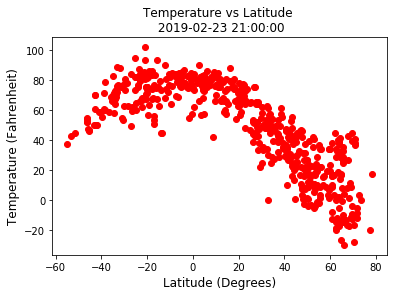

In [13]:
#Plot approprite x and y graph
plt.scatter(df.Lat,df.Temp_F,color="red")

#format plot
plt.title(f"Temperature vs Latitude \n {converted_date}")

plt.xlabel("Latitude (Degrees)",fontsize = 12)
plt.ylabel("Temperature (Fahrenheit)",fontsize=12)

#save figure
plt.savefig("Temperature vs Latitude.png")

#### Latitude vs. Humidity Plot

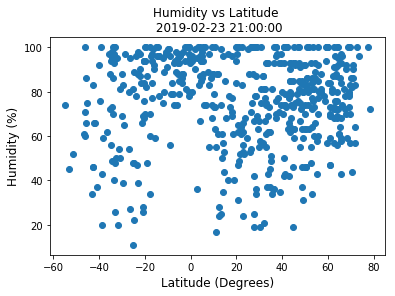

In [14]:
#Plot approprite x and y graph
plt.scatter(df.Lat,df.Humidity)

#format plot
plt.title(f"Humidity vs Latitude \n {converted_date}")
plt.xlabel("Latitude (Degrees)",fontsize = 12)
plt.ylabel("Humidity (%)",fontsize=12)

#save figure
plt.savefig("Humidity vs Latitude.png")

#### Latitude vs. Cloudiness Plot

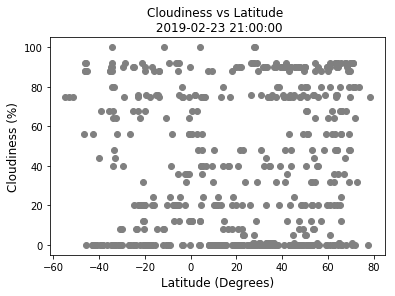

In [15]:
#Plot approprite x and y graph
plt.scatter(df.Lat,df.Cloudiness,color="grey")

#format plot
plt.title(f"Cloudiness vs Latitude \n {converted_date}")
plt.xlabel("Latitude (Degrees)",fontsize = 12)
plt.ylabel("Cloudiness (%)",fontsize=12)

#save figure
plt.savefig("Cloudiness vs Latitude.png")

#### Latitude vs. Wind Speed Plot

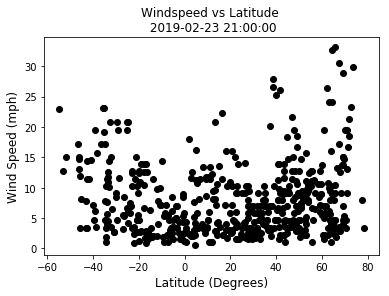

In [16]:
#Plot approprite x and y graph
plt.scatter(df.Lat,df.Windiness,color="black")

#format plot
plt.title(f"Windspeed vs Latitude \n {converted_date}")
plt.xlabel("Latitude (Degrees)",fontsize = 12)
plt.ylabel("Wind Speed (mph)",fontsize=12)

#save figure
plt.savefig("Windspeed vs Latitude.png")          

Analysis:  
There is no correlation between Latitude and windspeed, cloudiness, or humidity.

It would be interesting to investigate why and how cloudiness percentages are determined to see why there are clusters around certain numbers(90%,75%,20%,0)

There is a parabolic relationship between latitude and temperature with a parabolic vertex around 0.  I.E. the temperature is hottest around the equator and gets colder as one goes closer to the poles.

At this time of year negative latitudes(southern hemisphere) have higher temperatures compared to their positive counterpart which makes sense as it is currently winter in the northern hemisphere and summer in the southern.
